#Build Your Own Neural Network From Scratch!
In this workshop, we’ll build a simple 2-layer neural network
that can recognize handwritten digits (0–9) from the MNIST dataset.
We'll use only NumPy — no TensorFlow, no PyTorch.
This lets you see how a neural net actually works under the hood.


In [ ]:
# --- Import libraries ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [ ]:
print(" Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, parser='auto')

# Convert data to NumPy arrays and normalize pixel values (0-255 → 0-1)


# One-hot encode labels (e.g., 3 → [0,0,0,1,0,0,0,0,0,0])


# Split into train and test sets


# To keep it fast for workshop demo


print(f"Data ready! Training samples: {len(X_train)}, Test samples: {len(X_test)}")

 Loading MNIST dataset...
Data ready! Training samples: 10000, Test samples: 2000


In [ ]:
# ------------------------------------------------------------
# 2. Define helper functions
# ------------------------------------------------------------

# ReLU activation (used in hidden layer)
def relu(x):


# Derivative of ReLU (for backpropagation)
def relu_derivative(x):


# Softmax activation (used in output layer)
def softmax(x):


# Compute accuracy (for evaluation)
def accuracy(y_true, y_pred):


In [ ]:
# ------------------------------------------------------------
# 3. Initialize weights and hyperparameters
# ------------------------------------------------------------

input_size =   # 28x28 pixels
hidden_size =     # number of neurons in hidden layer
output_size =    # digits 0–9
learning_rate =
epochs =

# Randomly initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))


In [ ]:
# ------------------------------------------------------------
# 4. Forward propagation
# ------------------------------------------------------------
def forward(X):
    # Hidden layer
    Z1 = X @ W1 + b1         # Linear step
    A1 = relu(Z1)            # Apply ReLU
    # Output layer
    Z2 = A1 @ W2 + b2        # Linear step
    A2 = softmax(Z2)         # Apply softmax for probabilities
    return Z1, A1, Z2, A2

In [ ]:
# ------------------------------------------------------------
# 5. Backward propagation (gradient calculation)
# ------------------------------------------------------------
def backward(X, Y, Z1, A1, Z2, A2):
    m = X.shape[0]  # number of samples

    # Gradient of loss wrt Z2 (output layer)
    dZ2 = A2 - Y
    dW2 = (A1.T @ dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # Backprop through hidden layer
    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (X.T @ dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2

In [ ]:
# ------------------------------------------------------------
# 6. Training loop
# ------------------------------------------------------------
losses = []
accuracies = []

print("\n Training the neural network...\n")
for epoch in range(epochs):
    # Forward pass


    # Compute loss (cross-entropy)


    # Backpropagation
    dW1, db1, dW2, db2 = backward(X_train, y_train, Z1, A1, Z2, A2)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # Compute training accuracy
    train_acc = accuracy(y_train, A2)
    accuracies.append(train_acc)

    # Print progress every 100 epochs
    if epoch % 100 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch}/{epochs} | Loss: {loss:.4f} | Accuracy: {train_acc*100:.2f}%")

print("\n Training complete!")


 Training the neural network...

Epoch 0/1000 | Loss: 2.3026 | Accuracy: 10.30%
Epoch 100/1000 | Loss: 2.2957 | Accuracy: 27.01%
Epoch 200/1000 | Loss: 2.2827 | Accuracy: 34.65%
Epoch 300/1000 | Loss: 2.2538 | Accuracy: 34.38%
Epoch 400/1000 | Loss: 2.1920 | Accuracy: 35.08%
Epoch 500/1000 | Loss: 2.0797 | Accuracy: 39.74%
Epoch 600/1000 | Loss: 1.9072 | Accuracy: 49.09%
Epoch 700/1000 | Loss: 1.6800 | Accuracy: 58.58%
Epoch 800/1000 | Loss: 1.4387 | Accuracy: 65.87%
Epoch 900/1000 | Loss: 1.2299 | Accuracy: 71.74%
Epoch 999/1000 | Loss: 1.0698 | Accuracy: 75.27%

 Training complete!


In [ ]:
# ------------------------------------------------------------
# 7. Evaluate on test set
# ------------------------------------------------------------

print(f"\n Test accuracy: {test_acc*100:.2f}%")


 Test accuracy: 75.75%


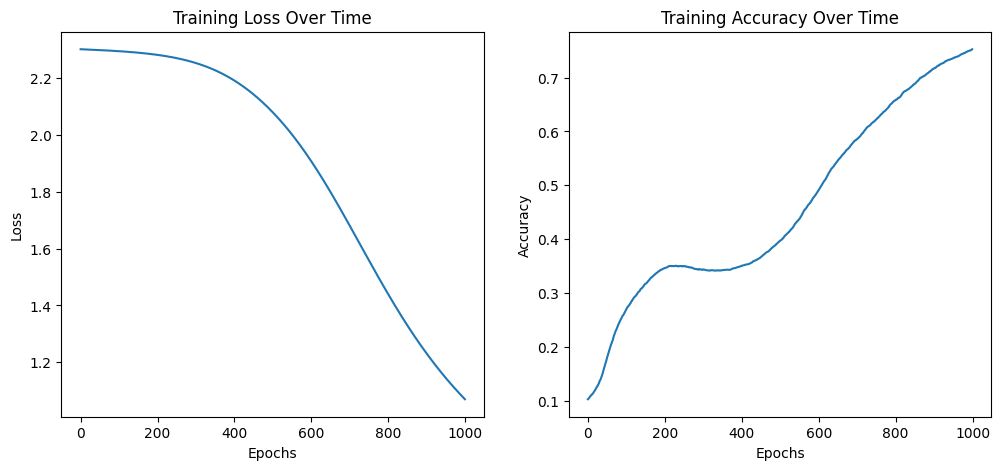

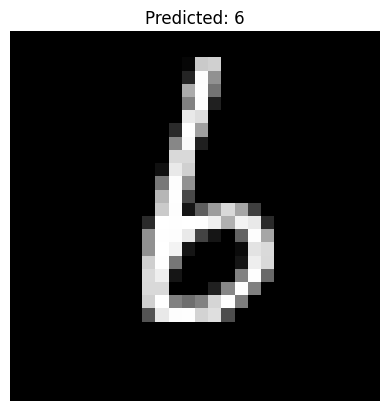

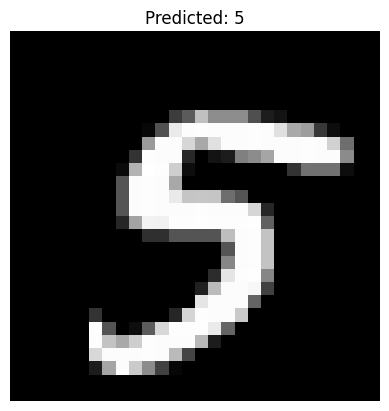

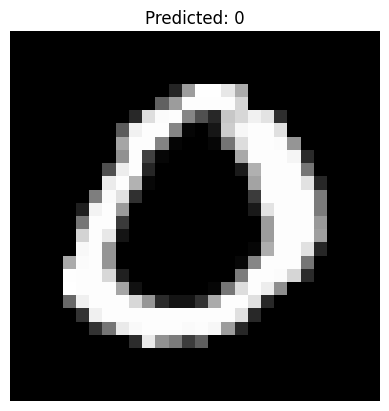

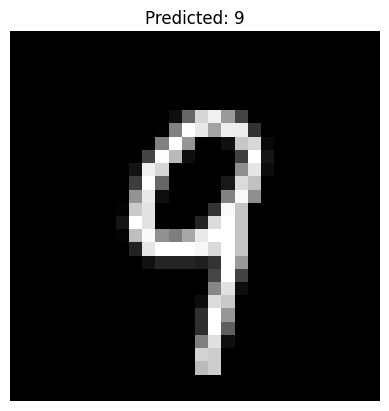

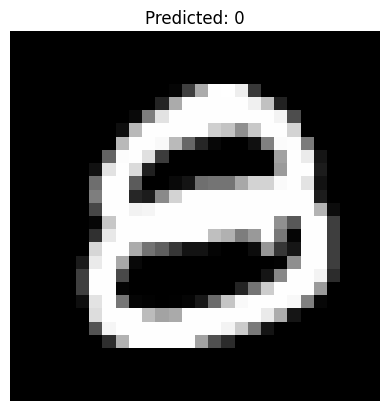

In [ ]:
# ------------------------------------------------------------
# 8. Visualize training progress
# ------------------------------------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(losses)
plt.title("Training Loss Over Time")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(accuracies)
plt.title("Training Accuracy Over Time")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.show()

# ------------------------------------------------------------
# 9. Test a few sample predictions visually
# ------------------------------------------------------------
samples = 5
indices = np.random.choice(len(X_test), samples)
sample_images = X_test[indices]
_, _, _, preds = forward(sample_images)

for i, idx in enumerate(indices):
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(preds[i])}")
    plt.axis('off')
    plt.show()